In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import itertools
import math
from pylab import rcParams

# 그래프 사이즈 지정
rcParams['figure.figsize'] = 15,10

In [2]:
df = pd.read_csv('./final.csv')
df['Date'] = pd.to_datetime(df['Date'])  # datetime으로 변환
df_y = df.iloc[1:, :]  # 데이터의 첫 날을 예측할 데이터가 존재하지 않기 때문에 제외

## 시계열 분석 코드 (SARIMAX)

In [3]:
df1 = df.set_index('Date').iloc[:-1,:]  # 마지막 Date 제거 (왜냐? 23년 1월 1일 데이터가 없어서 X값의 마지막 Date가 필요 없어)
df_y1 = df_y.set_index('Date')

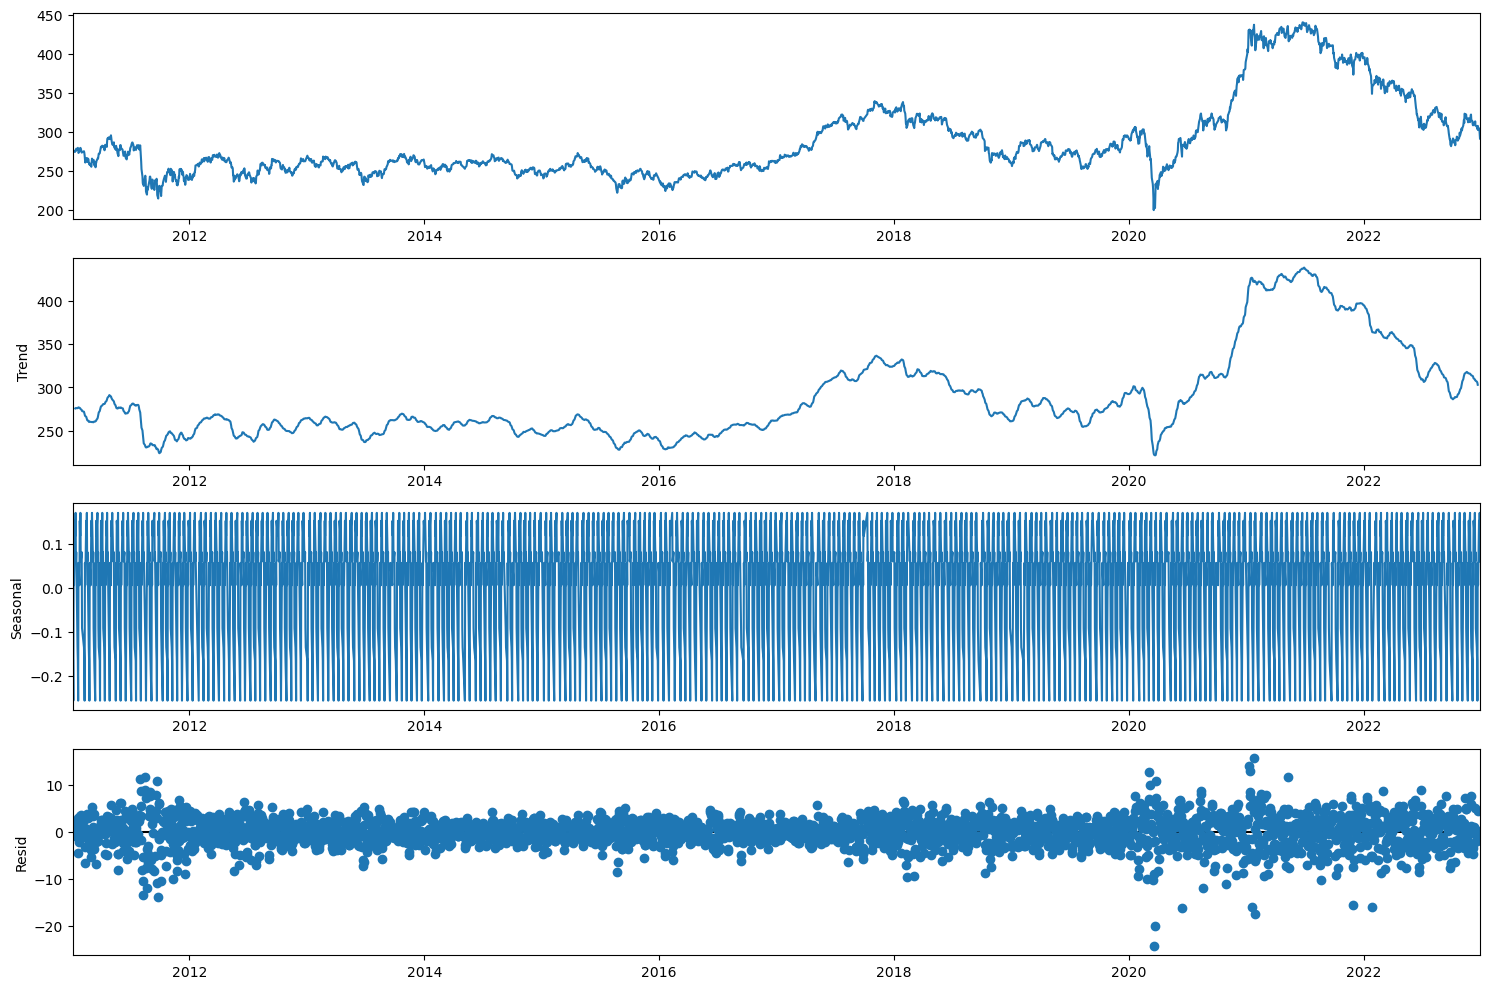

In [4]:
decomposition= sm.tsa.seasonal_decompose(df_y1, period = 11, model='additive')
fig = decomposition.plot()
plt.show()

생각해보면 시계열 분석은 일정 주기/기간을 분석하는 건데 하루를 분석하는 건 그닥 의미가 있어 보이지 않는다.  
그래서 1일 시계열 분석은 패스하기로!

## LSTM 준비용 코드

In [5]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [6]:
df1 = df1.reset_index()

In [7]:
x_list = []

In [8]:
# 모델을 만드는 목적: 전 날의 Close로 다음 날의 Close를 예측한다.

# 모델 학습에 필요한 데이터 정제
# 하루(1일)의 데이터를 묶어준다. -> 묶어준 데이터들을 x_list에 넣어준다.
for i in range(len(df1)):
    x_list.append([df1['Close'].values[i]])

In [9]:
x_list

[[273.81],
 [275.78],
 [275.35],
 [274.72],
 [275.61],
 [273.99],
 [275.1],
 [276.17],
 [275.52],
 [278.17],
 [277.05],
 [276.6],
 [279.25],
 [277.75],
 [272.67],
 [274.5],
 [275.18],
 [278.81],
 [279.2],
 [278.45],
 [273.12],
 [273.45],
 [274.9],
 [273.16],
 [269.9],
 [264.57],
 [260.4],
 [266.02],
 [265.4],
 [262.56],
 [261.23],
 [265.8],
 [264.55],
 [260.13],
 [259.21],
 [257.69],
 [259.28],
 [256.36],
 [254.96],
 [260.48],
 [265.42],
 [261.44],
 [263.33],
 [263.8],
 [260.59],
 [256.83],
 [260.69],
 [254.29],
 [259.44],
 [259.8],
 [262.39],
 [264.89],
 [266.05],
 [265.67],
 [268.93],
 [271.66],
 [272.13],
 [274.22],
 [277.04],
 [278.87],
 [280.73],
 [280.01],
 [282.03],
 [281.35],
 [280.45],
 [281.05],
 [280.49],
 [276.13],
 [280.68],
 [283.15],
 [282.8],
 [282.14],
 [280.43],
 [287.19],
 [291.16],
 [290.84],
 [292.69],
 [291.38],
 [292.08],
 [292.15],
 [290.39],
 [295.35],
 [291.65],
 [288.46],
 [283.68],
 [282.59],
 [286.3],
 [280.02],
 [279.59],
 [277.22],
 [277.15],
 [281.76],
 

In [10]:
X = np.array(x_list)

In [11]:
y_list = []

In [12]:
# 모델 학습에 필요한 데이터
# 하루(1일)의 데이터를 묶어준다. -> 묶어준 데이터들을 y_list에 넣어준다.
for i in range(len(df_y)):
    y_list.append([df_y['Close'].values[i]])

In [13]:
y_list

[[275.78],
 [275.35],
 [274.72],
 [275.61],
 [273.99],
 [275.1],
 [276.17],
 [275.52],
 [278.17],
 [277.05],
 [276.6],
 [279.25],
 [277.75],
 [272.67],
 [274.5],
 [275.18],
 [278.81],
 [279.2],
 [278.45],
 [273.12],
 [273.45],
 [274.9],
 [273.16],
 [269.9],
 [264.57],
 [260.4],
 [266.02],
 [265.4],
 [262.56],
 [261.23],
 [265.8],
 [264.55],
 [260.13],
 [259.21],
 [257.69],
 [259.28],
 [256.36],
 [254.96],
 [260.48],
 [265.42],
 [261.44],
 [263.33],
 [263.8],
 [260.59],
 [256.83],
 [260.69],
 [254.29],
 [259.44],
 [259.8],
 [262.39],
 [264.89],
 [266.05],
 [265.67],
 [268.93],
 [271.66],
 [272.13],
 [274.22],
 [277.04],
 [278.87],
 [280.73],
 [280.01],
 [282.03],
 [281.35],
 [280.45],
 [281.05],
 [280.49],
 [276.13],
 [280.68],
 [283.15],
 [282.8],
 [282.14],
 [280.43],
 [287.19],
 [291.16],
 [290.84],
 [292.69],
 [291.38],
 [292.08],
 [292.15],
 [290.39],
 [295.35],
 [291.65],
 [288.46],
 [283.68],
 [282.59],
 [286.3],
 [280.02],
 [279.59],
 [277.22],
 [277.15],
 [281.76],
 [276.47],
 

In [14]:
y = np.array(y_list)

## LSTM

In [15]:
from sklearn.model_selection import train_test_split
from keras import models, layers, callbacks, optimizers

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
x = layers.Input(shape=(X_train.shape[1], 1))
lstm = layers.LSTM(64, return_sequences=True)(x)
lstm = layers.LSTM(32)(lstm)
dense = layers.Dense(16)(lstm)
norm = layers.BatchNormalization()(dense)
relu = layers.ReLU()(norm)
y = layers.Dense(1)(relu)
model = models.Model(x, y)

optimizer = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer, 'mean_squared_error')  # loss function: mean_squared_error 사용

In [18]:
# EarlyStopping 선언
# patience: val_loss가 제일 낮아도 Epoch 50번은 더 해봐라
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50)

In [19]:
# 모델 학습
# history = model.fit(X_train, y_train, epochs = 1000, validation_data = [X_test, y_test], batch_size = 16, verbose = 1, callbacks = es)

# (EarlyStopping 없이) 모델 학습
history = model.fit(X_train, y_train, epochs = 500, validation_data = [X_test, y_test], batch_size = 16, verbose = 1)

Epoch 1/500
139/139 [==============================] - 8s 17ms/step - loss: 84816.7891 - val_loss: 84786.4375
Epoch 2/500
139/139 [==============================] - 1s 7ms/step - loss: 84527.7188 - val_loss: 84748.1875
Epoch 3/500
139/139 [==============================] - 1s 7ms/step - loss: 84205.9688 - val_loss: 84577.2891
Epoch 4/500
139/139 [==============================] - 1s 6ms/step - loss: 84051.1953 - val_loss: 84154.2031
Epoch 5/500
139/139 [==============================] - 1s 7ms/step - loss: 83937.9688 - val_loss: 83765.5938
Epoch 6/500
139/139 [==============================] - 1s 7ms/step - loss: 83828.9297 - val_loss: 84079.6719
Epoch 7/500
139/139 [==============================] - 1s 6ms/step - loss: 83730.6250 - val_loss: 83210.9922
Epoch 8/500
139/139 [==============================] - 1s 6ms/step - loss: 83629.7188 - val_loss: 83016.7969
Epoch 9/500
139/139 [==============================] - 1s 6ms/step - loss: 83529.4375 - val_loss: 83412.1641
Epoch 10/500
139/1

139/139 [==============================] - 1s 6ms/step - loss: 46177.3398 - val_loss: 44285.2305
Epoch 150/500
139/139 [==============================] - 1s 6ms/step - loss: 45897.8320 - val_loss: 24563.9004
Epoch 151/500
139/139 [==============================] - 1s 6ms/step - loss: 45602.5625 - val_loss: 47918.9375
Epoch 152/500
139/139 [==============================] - 1s 7ms/step - loss: 45232.6797 - val_loss: 42104.0234
Epoch 153/500
139/139 [==============================] - 1s 9ms/step - loss: 44848.8477 - val_loss: 41145.0898
Epoch 154/500
139/139 [==============================] - 1s 8ms/step - loss: 44442.3281 - val_loss: 40242.9102
Epoch 155/500
139/139 [==============================] - 1s 6ms/step - loss: 44431.9922 - val_loss: 23489.7402
Epoch 156/500
139/139 [==============================] - 1s 6ms/step - loss: 43867.1562 - val_loss: 56356.3945
Epoch 157/500
139/139 [==============================] - 1s 6ms/step - loss: 43675.5820 - val_loss: 19404.5820
Epoch 158/500
1

Epoch 223/500
139/139 [==============================] - 1s 8ms/step - loss: 23620.2891 - val_loss: 18462.0215
Epoch 224/500
139/139 [==============================] - 1s 8ms/step - loss: 23744.1289 - val_loss: 19270.1309
Epoch 225/500
139/139 [==============================] - 1s 8ms/step - loss: 24215.2227 - val_loss: 17571.8086
Epoch 226/500
139/139 [==============================] - 1s 6ms/step - loss: 23070.5391 - val_loss: 14953.7324
Epoch 227/500
139/139 [==============================] - 1s 6ms/step - loss: 23022.0059 - val_loss: 18541.1875
Epoch 228/500
139/139 [==============================] - 1s 7ms/step - loss: 22503.6973 - val_loss: 25699.3613
Epoch 229/500
139/139 [==============================] - 1s 8ms/step - loss: 22496.8496 - val_loss: 15300.8340
Epoch 230/500
139/139 [==============================] - 1s 8ms/step - loss: 22123.3672 - val_loss: 19441.6367
Epoch 231/500
139/139 [==============================] - 1s 9ms/step - loss: 21789.5586 - val_loss: 22695.7188
E

139/139 [==============================] - 1s 6ms/step - loss: 531.8754 - val_loss: 1260.9755
Epoch 373/500
139/139 [==============================] - 1s 7ms/step - loss: 539.9048 - val_loss: 5271.3760
Epoch 374/500
139/139 [==============================] - 1s 6ms/step - loss: 520.7078 - val_loss: 5835.1665
Epoch 375/500
139/139 [==============================] - 1s 7ms/step - loss: 569.4560 - val_loss: 9293.2666
Epoch 376/500
139/139 [==============================] - 1s 6ms/step - loss: 523.0519 - val_loss: 1752.6624
Epoch 377/500
139/139 [==============================] - 1s 7ms/step - loss: 551.0136 - val_loss: 1904.6780
Epoch 378/500
139/139 [==============================] - 1s 6ms/step - loss: 496.3595 - val_loss: 2384.0369
Epoch 379/500
139/139 [==============================] - 1s 6ms/step - loss: 550.0905 - val_loss: 7485.5649
Epoch 380/500
139/139 [==============================] - 1s 6ms/step - loss: 477.4432 - val_loss: 9699.7959
Epoch 381/500
139/139 [===================

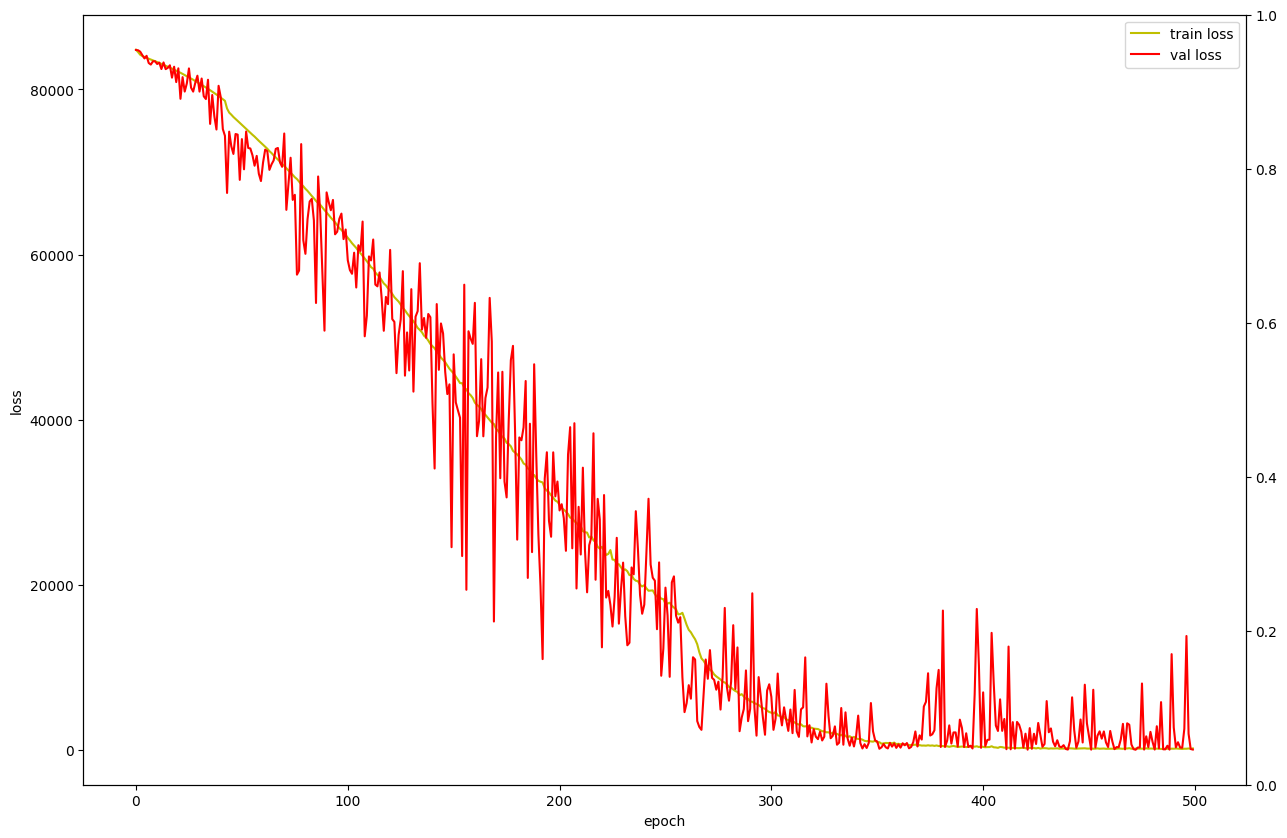

In [20]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.legend()
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

plt.show()

## 결정 계수(r2_score)
생성한 모델이 얼마나 데이터를 잘 설명하는가?

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
y_train_predict = model.predict(X_train)

70/70 [==============================] - 2s 4ms/step


In [23]:
print(r2_score(y_train, y_train_predict))

0.9785531009738793


In [24]:
# mean_squared_error: 잔차의 제곱의 평균 = 잔차가 큰 데이터를 더 큰 패널티를 주는 것

# √mean_squared_error: 루트를 씌워주는 이유는 제곱을 지워주기 위해서
print(math.sqrt(mean_squared_error(y_train, y_train_predict)))  # sqrt: 루트

7.310671737335441


In [25]:
# X_test으로 y_test 예측
y_test_predict = model.predict(y_test)

24/24 [==============================] - 0s 3ms/step


In [26]:
# y_test 결정 계수
print(r2_score(y_test, y_test_predict))

0.9825250183155739


In [27]:
# mean_squared_error: 잔차의 제곱의 평균 = 잔차가 큰 데이터를 더 큰 패널티를 주는 것

# √mean_squared_error: 루트를 씌워주는 이유는 제곱을 지워주기 위해서
print(math.sqrt(mean_squared_error(y_test, y_test_predict)))  # sqrt: 루트

6.645756740035582


## 예측

In [28]:
# 2월 16일의 Close 값
test_list = [324.1]

In [29]:
test_array = np.array(test_list)

In [30]:
model.predict(test_array.reshape(1, test_array.shape[0], 1))

1/1 [==============================] - 1s 1s/step


array([[312.01932]], dtype=float32)

실제값:320.78

## 실제값과 예측값 시각화

In [31]:
# 전체 데이터 (11년 1월 ~ 22년 11월) 예측
visual_predict = model.predict(X.reshape(2956, 1, 1))

93/93 [==============================] - 0s 3ms/step


In [32]:
# 컬럼명이 Close인 빈 데이터 프레임 만들기
# visual_y: 예측값을 넣을 데이터 프레임
visual_y = pd.DataFrame(columns = ['Close'])

In [33]:
# 예측값을 visual_y 데이터 프레임에 넣어주기
for i in range(len(visual_predict.reshape(-1))) :
    visual_y.loc[i] = visual_predict.reshape(-1)[i]

In [34]:
visual_y

,Close
0,270.471252
1,272.324402
2,271.914490
3,271.330414
4,272.165314
...,...
2951,300.100403
2952,295.758881
2953,295.922028
2954,297.505554


In [35]:
# 빈 데이터 프레임 만들기
# visual_t: 실제값을 넣을 데이터 프레임
visual_t = df_y

In [36]:
# visual_y에 Date 붙여주기
visual_y = pd.concat([visual_y, visual_t['Date']], axis = 1)

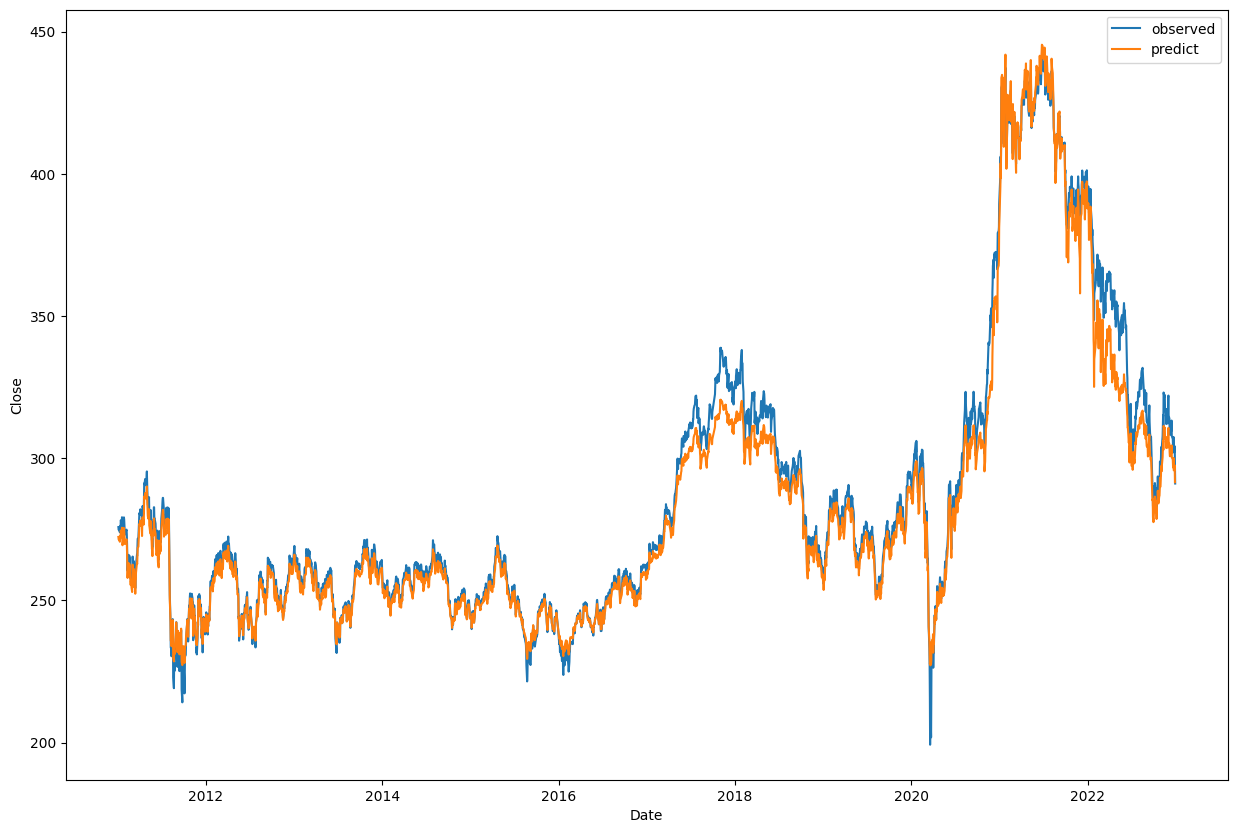

In [37]:
sns.lineplot(visual_t, x = 'Date', y = 'Close', label='observed')
sns.lineplot(visual_y, x = 'Date', y = 'Close', label='predict')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()